In [15]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import warnings

from fbprophet import Prophet

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [2]:
# Download BTC data using yfinance
df = yf.download('BTC-USD', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490


In [4]:
# Reset index which is required by fbprophet
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...,...
1948,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
1949,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
1950,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
1951,2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317


In [5]:
df[['ds','y']] = df[['Date','Adj Close']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104,2016-12-31,963.742981
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01,998.325012
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02,1021.750000
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03,1043.839966
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04,1154.729980


In [6]:
# Create instance of Prophet class
model = Prophet()

In [7]:
# Fit the model variable to the dataframe - takes ds and y cols as parameters
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -30.1126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


      99       3844.68    0.00596752       452.773           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3935.42     0.0541341       950.736      0.3752           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3996.93    0.00986468       274.047           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       4006.51   0.000487515       292.436    2.39e-06       0.001      447  LS failed, Hessian reset 
     399       4009.27   0.000413174        66.006      0.3621           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4014.87     0.0273268       227.396           1           1      621   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

In [8]:
# Make the future dataframe
future = model.make_future_dataframe(365)

In [9]:
forecast = model.predict(future)

In [10]:
# Predicted BTC price is in yhat column
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-31,-1138.779935,-4544.409407,6305.685013,-1138.779935,-1138.779935,1929.983930,1929.983930,1929.983930,14.768147,14.768147,14.768147,1915.215782,1915.215782,1915.215782,0.0,0.0,0.0,791.203995
1,2017-01-01,-1109.730630,-4723.298526,6040.061209,-1109.730630,-1109.730630,1958.816316,1958.816316,1958.816316,-5.998006,-5.998006,-5.998006,1964.814322,1964.814322,1964.814322,0.0,0.0,0.0,849.085686
2,2017-01-02,-1080.681324,-4374.343995,6267.318820,-1080.681324,-1080.681324,2022.016167,2022.016167,2022.016167,25.205325,25.205325,25.205325,1996.810842,1996.810842,1996.810842,0.0,0.0,0.0,941.334843
3,2017-01-03,-1051.632018,-4764.182295,6329.764609,-1051.632018,-1051.632018,2001.040580,2001.040580,2001.040580,-8.729283,-8.729283,-8.729283,2009.769863,2009.769863,2009.769863,0.0,0.0,0.0,949.408562
4,2017-01-04,-1022.582713,-4403.343861,6733.906549,-1022.582713,-1022.582713,2049.933426,2049.933426,2049.933426,47.333002,47.333002,47.333002,2002.600423,2002.600423,2002.600423,0.0,0.0,0.0,1027.350713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2023-05-02,33375.698560,14221.846504,52507.532042,15152.300701,51652.439434,292.984058,292.984058,292.984058,-8.729283,-8.729283,-8.729283,301.713341,301.713341,301.713341,0.0,0.0,0.0,33668.682618
2314,2023-05-03,33352.548180,14876.884699,52149.665041,15027.252601,51704.713295,374.580848,374.580848,374.580848,47.333002,47.333002,47.333002,327.247846,327.247846,327.247846,0.0,0.0,0.0,33727.129028
2315,2023-05-04,33329.397800,14757.174213,52011.278730,14889.253331,51754.947539,296.169144,296.169144,296.169144,-45.814019,-45.814019,-45.814019,341.983163,341.983163,341.983163,0.0,0.0,0.0,33625.566944
2316,2023-05-05,33306.247420,14923.706036,53281.981538,14777.501543,51805.181783,317.424616,317.424616,317.424616,-26.765166,-26.765166,-26.765166,344.189782,344.189782,344.189782,0.0,0.0,0.0,33623.672036


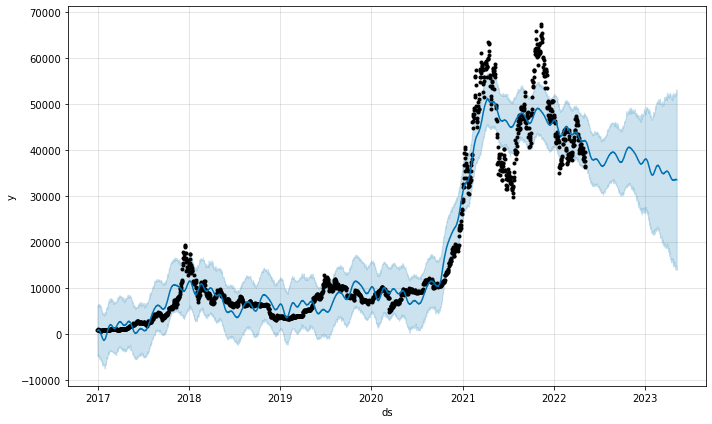

In [13]:
model.plot(forecast)
plt.show()

### Show seasonality components
---

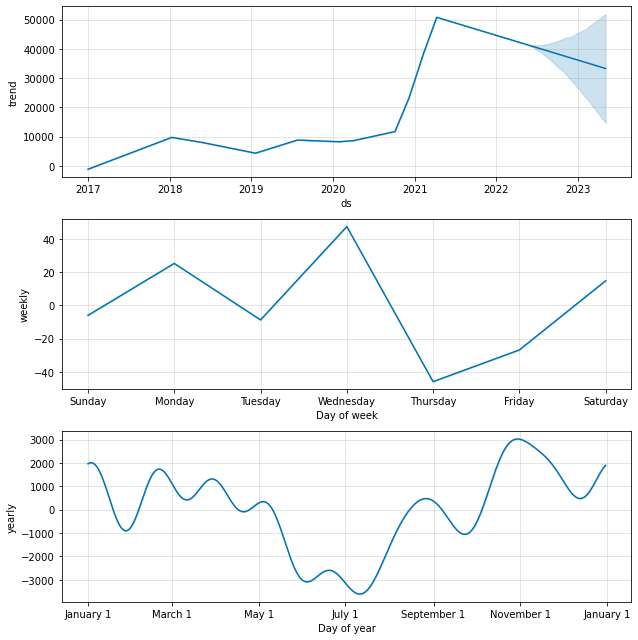

In [14]:
# Trend, weekly and yearly seasonality
model.plot_components(forecast)
plt.show()

### Let's create a function to wrap this up
---

[*********************100%***********************]  1 of 1 completed

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -37.399
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3335.37     0.0320026       207.401      0.6685      0.6685      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3375.76    0.00225397       169.409           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       3386.42     0.0005141       193.887    3.15e-06       0.001      374  LS failed, Hessian reset 
     299       3389.87     0.0100224       172.482           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       3392.21   0.000389663       181.629    4.05e-06       0.001      477  LS failed, Hessian reset 
     399       3393.85   3.94226e-05       64.6712      0.3838      0.3838      566   
    Iter      log pro

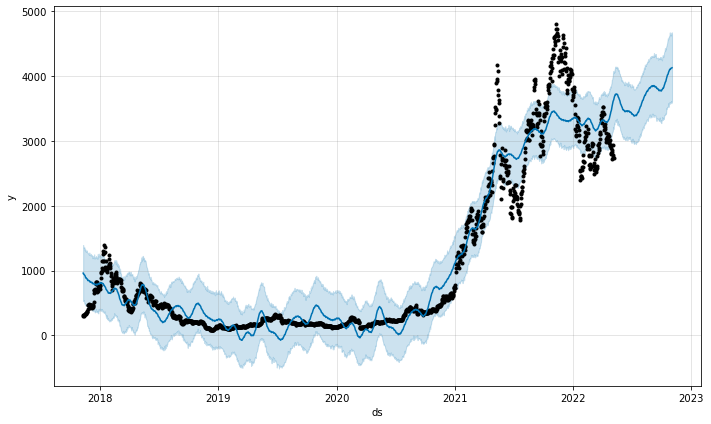

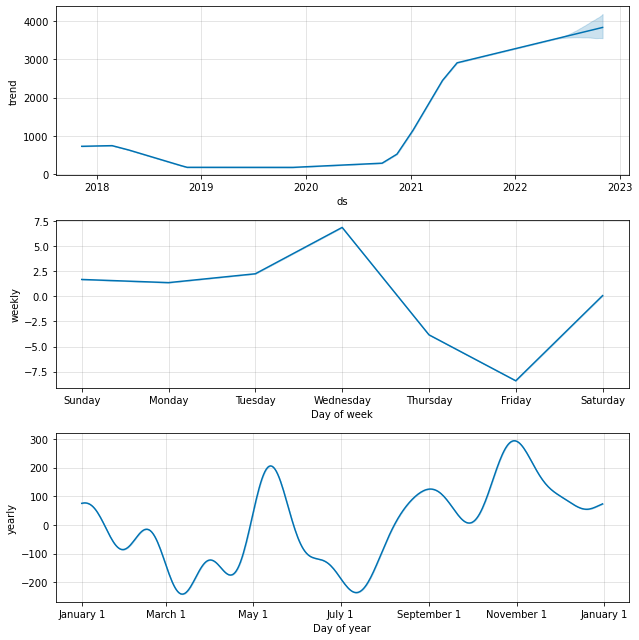

In [30]:
def price_forecast_yfinance(ticker, years_back=5, days_forecast=180):
    # Set start and end dates
    end_date = dt.datetime.now()
    # Subtract number of years back
    start_date = dt.datetime(end_date.year - years_back, end_date.month, end_date.day)
    
    # Download BTC data using yfinance
    df = yf.download(ticker, start=start_date, end=end_date)
    # Reset index for fbprophet
    df.reset_index(inplace=True)
    # Create parameters for Prophet
    df[['ds','y']] = df[['Date','Adj Close']]
    # print(df)
    # Create instance of Prophet class
    model = Prophet()
    # Fit the model variable to the dataframe - takes ds and y cols as parameters
    model.fit(df)
    # Make the future dataframe
    future = model.make_future_dataframe(days_forecast)
    # Create forecast dataframe
    forecast = model.predict(future)
    # Plot forecasts, Trend, weekly and yearly seasonality
    model.plot(forecast), model.plot_components(forecast)


price_forecast_yfinance('ETH-USD')